In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

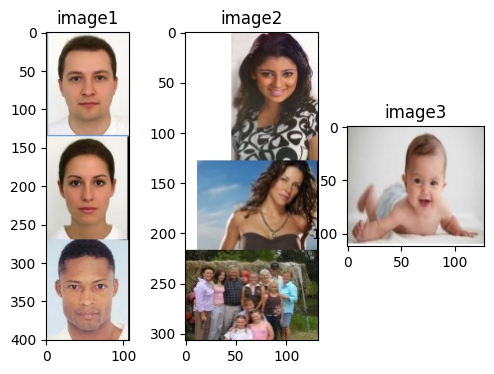

In [2]:
name = ['skin1.png', 'skin2.png', 'skin3.png']
plots = [131,132,133]
images = []
plt.figure(figsize=(6,4))
for i,n in enumerate(name):
    image = cv2.imread(f'media/images/{n}')
    images.append(image)
    plt.subplot(plots[i]);plt.imshow(image[...,::-1]);plt.title('image{}'.format(i+1))

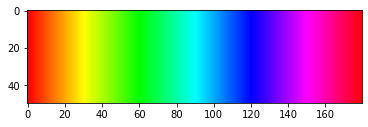

In [3]:
hue_spectrum = np.linspace(0, 179, dtype='uint8', num=180)
img = np.array([hue_spectrum]*50)
saturation_channel = np.ones_like(img, dtype='uint8') * 255
value_channel = np.ones_like(img, dtype='uint8') * 255

hsv = cv2.merge([img, saturation_channel, value_channel])
final_bgr_spectrum = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

plt.imshow(final_bgr_spectrum[...,::-1])

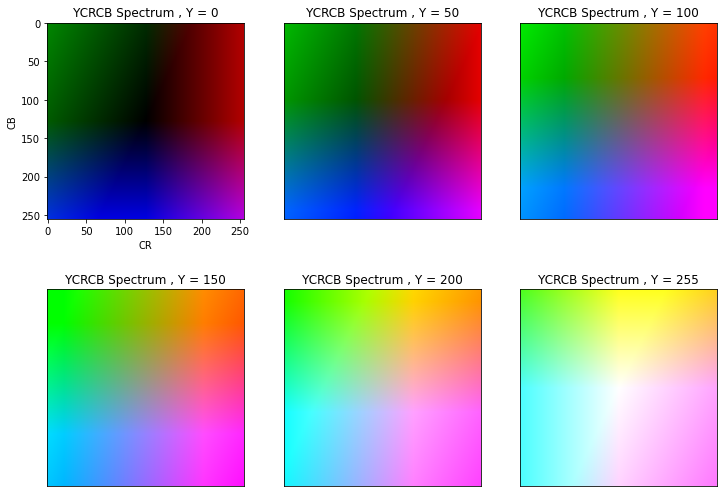

In [11]:
cr_range = np.linspace(0, 255, 256)
cb_range = np.linspace(0, 255, 256)
cr_values, cb_values = np.meshgrid(cr_range, cb_range)

Constant_Y_values = [0,50,100,150,200,255]
plots = [231,232,233,234,235,236]
plt.figure(figsize=(12,9))

for i, Y_item in enumerate(Constant_Y_values):
    
    y_values = np.full_like(cr_values, Y_item) 
    ycrcb_spectrum = np.dstack((y_values, cr_values, cb_values)).astype(np.uint8)

    rgb_spectrum = cv2.cvtColor(ycrcb_spectrum, cv2.COLOR_YCrCb2RGB)
    plt.subplot(plots[i]);plt.title('YCRCB Spectrum , Y = {}'.format(Constant_Y_values[i]))
    
    if i != 0:
        plt.xticks([]);plt.yticks([])
    if i == 0:    
        plt.xlabel('CR');plt.ylabel('CB')
    plt.imshow(rgb_spectrum)
    
    

In [62]:
def create_BGR_mask(img):
    B,G,R = cv2.split(img)
    bgr_mask = (B > 20) & (G > 40) & (R > 95) & (R > B) & (R > G) & (abs(R - G) > 15)
    return bgr_mask

def create_HSV_mask(img):
    hsv_L = np.array([0, 0.23 * 255, 40])
    hsv_H = np.array([50, 0.68 * 255, 255])
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_mask = cv2.inRange(hsv, hsv_L, hsv_H)
    return hsv_mask

def create_YCRCB_mask(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
    Y, Cr, Cb = cv2.split(ycrcb)
    
    ycrcb_mask = (Y > 80) & (Cr > 135) & (Cb > 85) & (Cr <= (1.5862*Cb)+20) & (Cr>=(0.3448*Cb)+76.2069) \
            & (Cr >= (-4.5652*Cb)+234.5652) & (Cr <= (-1.15*Cb)+301.75) & (Cr <= (-2.2857*Cb)+432.85)
        
    return ycrcb_mask

### Use only HSV_mask

In [ ]:
print('HSV_mask')
plt.figure(figsize=(15,12))
plots = [331,332,333,334,335,336,337,338,339]

for i,img in enumerate(images):
    i = i * 3 
    hsv_mask = create_HSV_mask(img)
    output = cv2.bitwise_and(img, img, mask = hsv_mask)
    
    plt.subplot(plots[i]);plt.imshow(img[...,::-1]);plt.title('Org_image')
    plt.subplot(plots[i] + 1);plt.imshow(hsv_mask, cmap = 'gray');plt.title('mask');plt.xticks([]);plt.yticks([])
    plt.subplot(plots[i] + 2);plt.imshow(output[...,::-1]);plt.title('Output');plt.xticks([]);plt.yticks([])

### Use only BGR_mask

BGR_mask


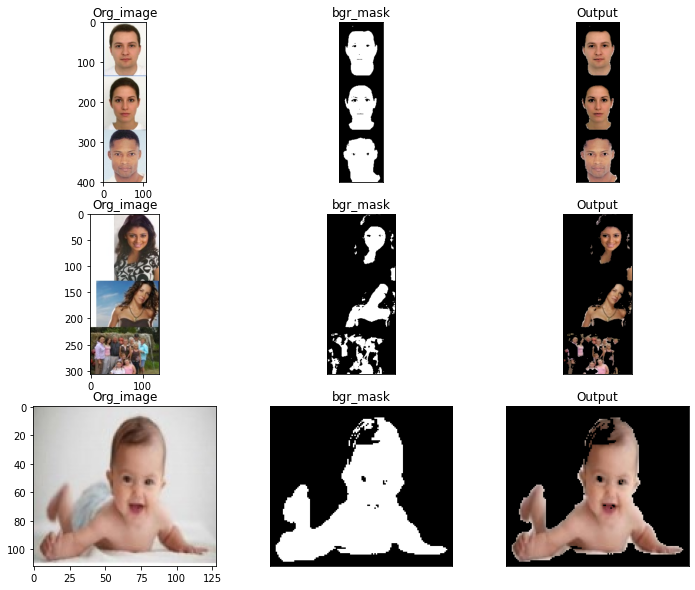

In [40]:
print('BGR_mask')
plt.figure(figsize=(12,10))
plots = [331,332,333,334,335,336,337,338,339]

for i, img in enumerate(images):
    i = i * 3
    bgr_mask = create_BGR_mask(img)
    output = np.zeros_like(img)
    output[bgr_mask] = img[bgr_mask]
    
    plt.subplot(plots[i]);plt.imshow(img[...,::-1]);plt.title('Org_image')
    plt.subplot(plots[i] + 1);plt.imshow(bgr_mask, cmap = 'gray');plt.title('bgr_mask');plt.xticks([]);plt.yticks([])
    plt.subplot(plots[i] + 2);plt.imshow(output[...,::-1]);plt.title('Output');plt.xticks([]);plt.yticks([])

### Use  only YCRCB_mask

YCRCB_mask


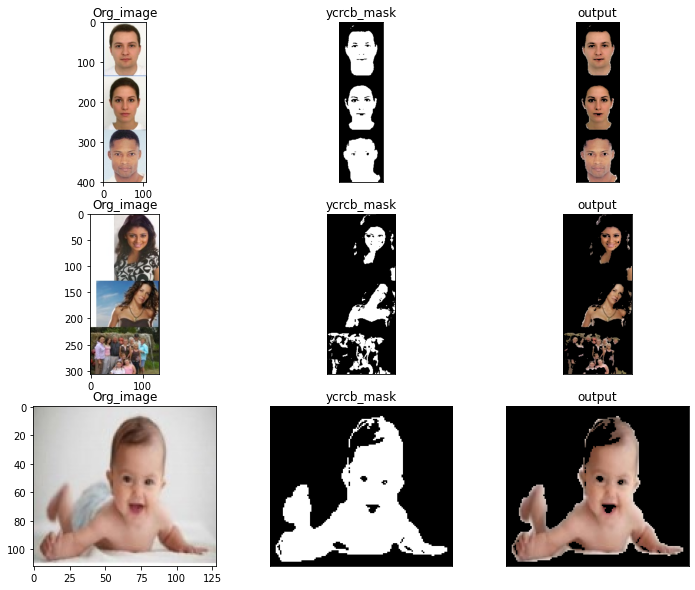

In [63]:
print('YCRCB_mask')
plt.figure(figsize=(12,10))
plots = [331,332,333,334,335,336,337,338,339]

for i, img in enumerate(images):
    i = i * 3
    ycrcb_mask = create_YCRCB_mask(img)  
    output = np.zeros_like(img)
    output[ycrcb_mask] = img[ycrcb_mask]
    output = np.uint8(output)
    plt.subplot(plots[i]);plt.imshow(img[...,::-1]);plt.title('Org_image')
    plt.subplot(plots[i] + 1);plt.imshow(ycrcb_mask, cmap = 'gray');plt.title('ycrcb_mask');plt.xticks([]);plt.yticks([])
    plt.subplot(plots[i] + 2);plt.imshow(output[...,::-1]);plt.title('output');plt.xticks([]);plt.yticks([])

### Use BGR_mask and HSV_mask

In [ ]:
plt.figure(figsize=(12,10))
plots = [331,332,333,334,335,336,337,338,339]

for i,img in enumerate(images):
    i = i * 3
    B,G,R = cv2.split(img)
    bgr_mask = create_BGR_mask(img)
    hsv_mask = create_HSV_mask(img)
    
    final_mask = bgr_mask & hsv_mask
    final_output = cv2.bitwise_and(img, img, mask = final_mask)
    
    plt.subplot(plots[i]);plt.imshow(img[...,::-1]);plt.title('org_image')
    plt.subplot(plots[i] + 1);plt.imshow(final_mask, cmap = 'gray');plt.title('bgr and hsv');plt.xticks([]);plt.yticks([])
    plt.subplot(plots[i] + 2);plt.imshow(final_output[...,::-1]);plt.title('output');plt.xticks([]);plt.yticks([])

### Use BGR and YCRCB mask

BGR_mask AND YCRCB_mask


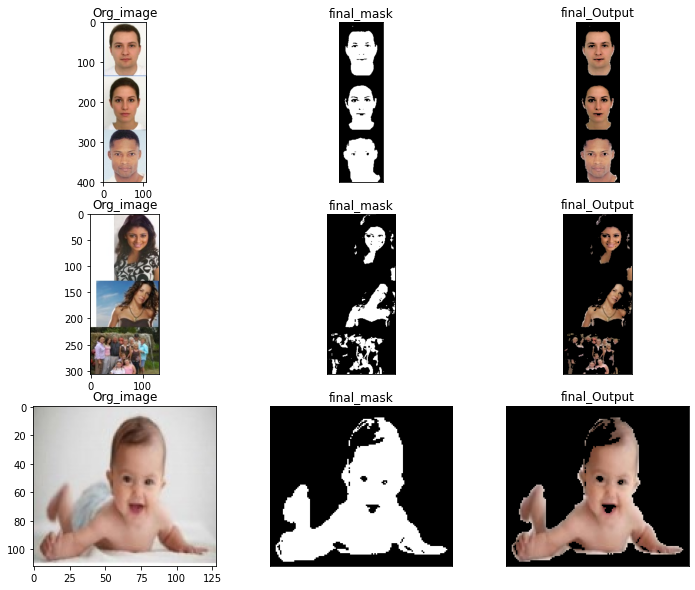

In [64]:
print('BGR_mask AND YCRCB_mask')
plt.figure(figsize=(12,10))
plots = [331,332,333,334,335,336,337,338,339]

for i,img in enumerate(images):
    i = i * 3
    bgr_mask = create_BGR_mask(img)
    ycrcb_mask = create_YCRCB_mask(img)
    ycrcb_mask = np.uint8(ycrcb_mask)
    
    final_mask = ycrcb_mask & bgr_mask
    final_output = cv2.bitwise_and(img ,img, mask = final_mask)
    
    plt.subplot(plots[i]);plt.imshow(img[...,::-1]);plt.title('Org_image')
    plt.subplot(plots[i] + 1);plt.imshow(final_mask, cmap = 'gray');plt.title('final_mask');plt.xticks([]);plt.yticks([])
    plt.subplot(plots[i] + 2);plt.imshow(final_output[...,::-1]);plt.title('final_Output');plt.xticks([]);plt.yticks([])

### Use YCRCB and HSV mask

YCRCB_mask AND HSV_mask


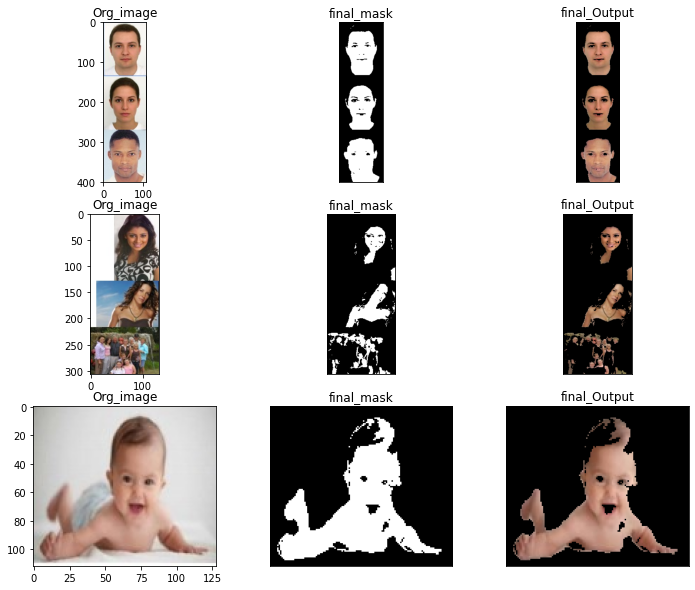

In [49]:
print('YCRCB_mask AND HSV_mask')
plt.figure(figsize=(12,10))
plots = [331,332,333,334,335,336,337,338,339]

for i,img in enumerate(images):
    i = i * 3
    ycrcb_mask = create_YCRCB_mask(img)
    hsv_mask = create_HSV_mask(img)
    
    final_mask = ycrcb_mask & hsv_mask
    final_output = cv2.bitwise_and(img, img, mask = final_mask)
    
    plt.subplot(plots[i]);plt.imshow(img[...,::-1]);plt.title('Org_image')
    plt.subplot(plots[i] + 1);plt.imshow(final_mask, cmap = 'gray');plt.title('ycrcb and hsv');plt.xticks([]);plt.yticks([])
    plt.subplot(plots[i] + 2);plt.imshow(final_output[...,::-1]);plt.title('final_Output');plt.xticks([]);plt.yticks([])

### Use filters and morphology operations  

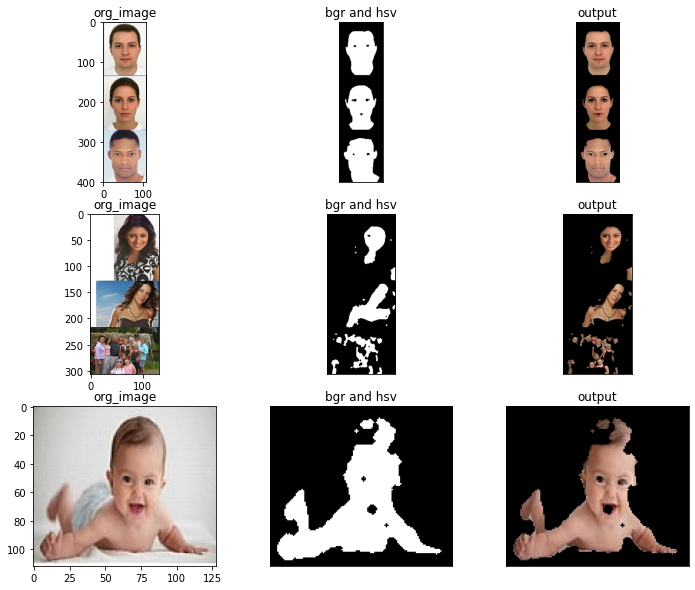

In [121]:
plt.figure(figsize=(12,10))
plots = [331,332,333,334,335,336,337,338,339]

for i,img in enumerate(images):
    i = i * 3
    kernel1 = np.array([[0,0,0], 
                              [0,2,0], 
                              [0,0,0]])

    kernel2 = 1/9*np.array([[1,1,1], 
                              [1,1,1], 
                              [1,1,1]])

    final_kernel = kernel1-kernel2
    img = cv2.filter2D(img, -1, final_kernel)
    # gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gaussian = cv2.GaussianBlur(img,(3,3),0)
    median = cv2.medianBlur(gaussian,3)

    bgr_mask = create_BGR_mask(median)
    hsv_mask = create_HSV_mask(median)
    mask = bgr_mask & hsv_mask
    
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    opened_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    closed_mask = cv2.morphologyEx(opened_mask, cv2.MORPH_CLOSE, kernel)

    output = cv2.bitwise_and(img, img, mask=closed_mask)
    
    plt.subplot(plots[i]);plt.imshow(img[...,::-1], cmap = 'gray');plt.title('org_image')
    plt.subplot(plots[i] + 1);plt.imshow(closed_mask, cmap = 'gray');plt.title('bgr and hsv');plt.xticks([]);plt.yticks([])
    plt.subplot(plots[i] + 2);plt.imshow(output[...,::-1]);plt.title('output');plt.xticks([]);plt.yticks([])